# Bank Note Authentication

I build 6 classification models to detect the authenticity of banknotes using the Banknote Authentication UCI dataset.
#### 6 classification models are:
1. Logistic Regression
2. Naive Bayes
3. K-Nearest Neighbors
4. Support Vector Machine
5. Random Forest
6. Multi-Layer Perceptron (Neural Networks)

#### Attribute Information:
1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

Dataset Source: http://archive.ics.uci.edu/ml/datasets/banknote+authentication


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

## EDA

In [2]:
df = pd.read_csv('data/BankNote_Authentication_UCI.csv')
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [4]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

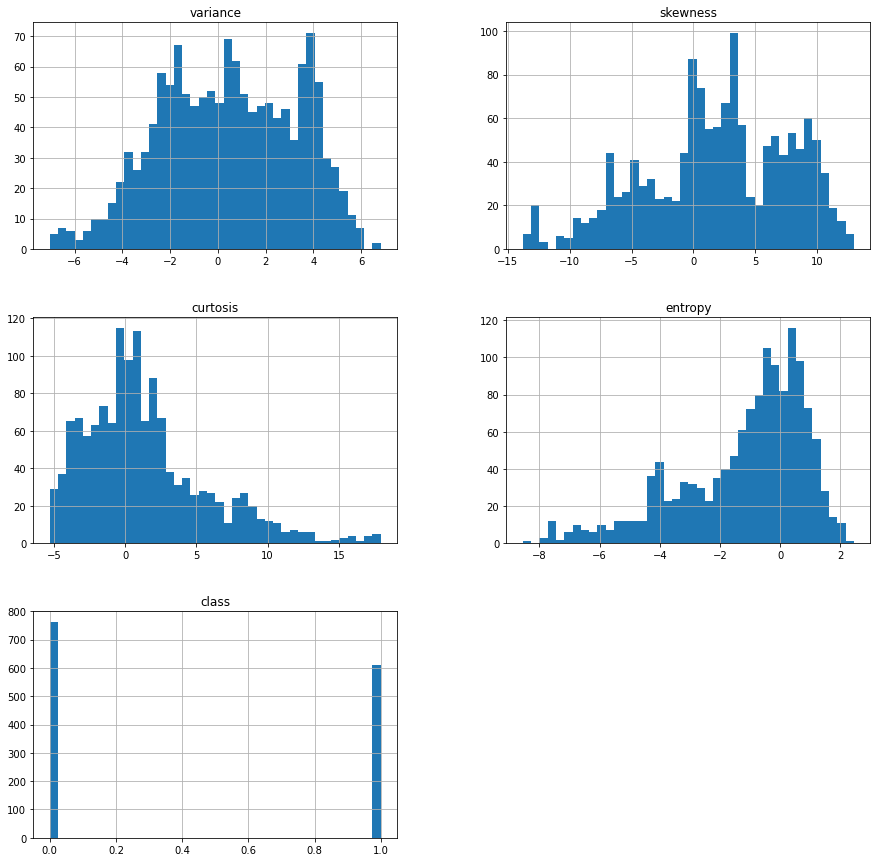

In [5]:
df.hist(bins=40, figsize=(15,15));

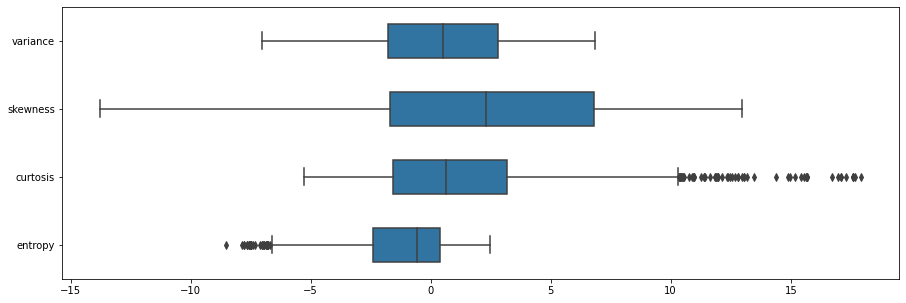

In [6]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df.iloc[:,:-1], orient='h', width=.5, color='tab:blue');

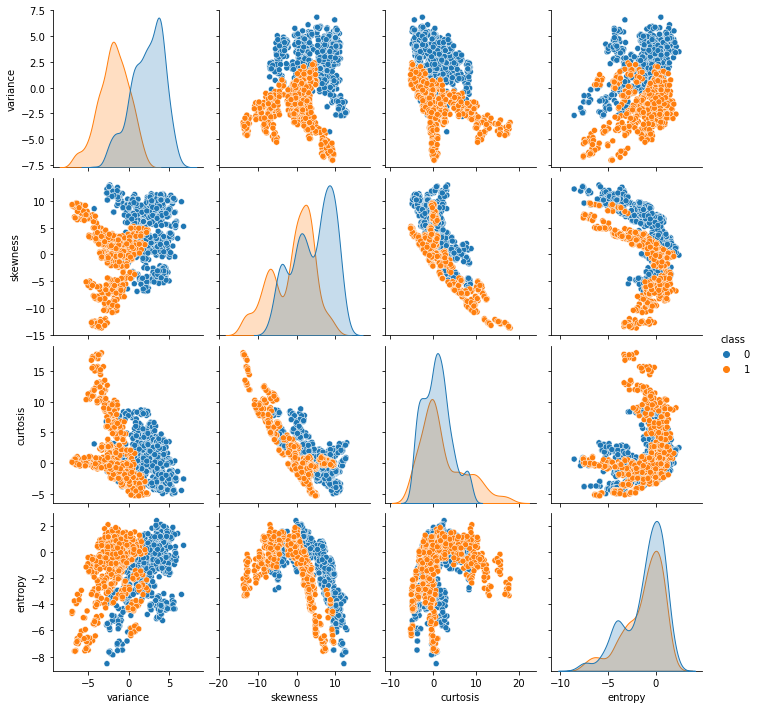

In [7]:
sns.pairplot(df, hue='class');

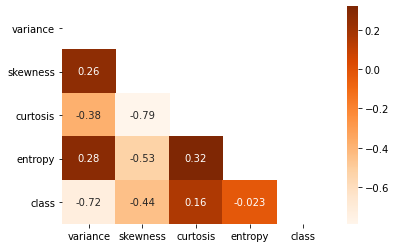

In [8]:
mask = np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(), annot=True, mask=mask, cmap='Oranges');

In [9]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


## Data Preparation

In [10]:
X = df.drop('class', axis=1)
Y = df['class']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=3)
x_train.shape, x_test.shape

((1097, 4), (275, 4))

In [11]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Building Models

In [12]:
k = KFold(n_splits=10, shuffle=True, random_state=2)

In [13]:
def show_result(y_true, y_predicted):
    print(classification_report(y_true, y_predicted))
    ConfusionMatrixDisplay(confusion_matrix(y_true, y_predicted), display_labels=[0,1]).plot();


## 1. Logistic Regression

In [14]:
param_grid= {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

grid = GridSearchCV(LogisticRegression(random_state=1), param_grid, n_jobs=-1)
grid.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [15]:
grid.best_params_

{'solver': 'newton-cg'}

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       594
           1       0.96      0.99      0.98       503

    accuracy                           0.98      1097
   macro avg       0.98      0.98      0.98      1097
weighted avg       0.98      0.98      0.98      1097



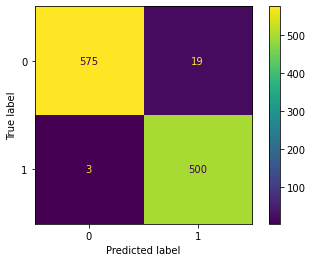

In [16]:
lr_model = LogisticRegression(solver='newton-cg', random_state=1)

y_cv = cross_val_predict(lr_model, x_train, y_train, cv=k, n_jobs=-1)

show_result(y_train, y_cv)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       168
           1       0.96      1.00      0.98       107

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.98       275
weighted avg       0.99      0.99      0.99       275



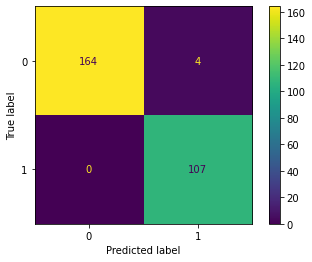

In [17]:
lr_model.fit(x_train, y_train)
y_lr = lr_model.predict(x_test)

show_result(y_test, y_lr)

## 2. Naive Bayes

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       594
           1       0.85      0.79      0.82       503

    accuracy                           0.84      1097
   macro avg       0.84      0.83      0.84      1097
weighted avg       0.84      0.84      0.84      1097



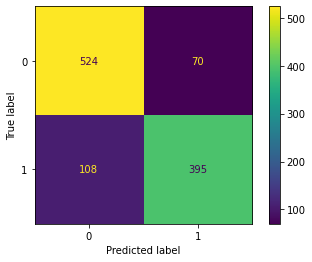

In [18]:
nb_model = GaussianNB()

y_cv = cross_val_predict(nb_model, x_train, y_train, cv=k, n_jobs=-1)
show_result(y_train, y_cv)

              precision    recall  f1-score   support

           0       0.89      0.88      0.89       168
           1       0.82      0.83      0.82       107

    accuracy                           0.86       275
   macro avg       0.85      0.86      0.86       275
weighted avg       0.86      0.86      0.86       275



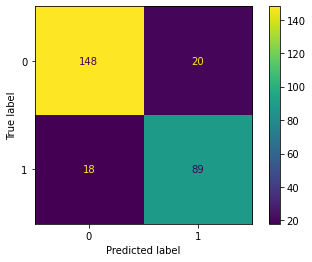

In [19]:
nb_model.fit(x_train, y_train)
y_nb = nb_model.predict(x_test)
show_result(y_test, y_nb)

## 3. KNN

In [20]:
param_grid = {'n_neighbors':[2,3,4,5], 
              'weights':['uniform', 'distance'], 
              'leaf_size':[2,3,4], 
              'p':[1,2]}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, n_jobs=-1)
grid.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'leaf_size': [2, 3, 4], 'n_neighbors': [2, 3, 4, 5],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [21]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1, 'weights': 'uniform'}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       503

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097



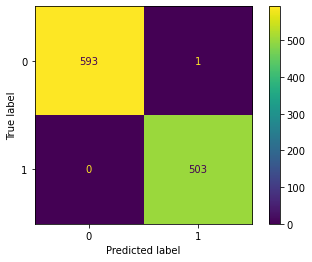

In [22]:
knn_model = KNeighborsClassifier(leaf_size=2, n_neighbors=2, p=1, weights='uniform')

y_cv = cross_val_predict(knn_model, x_train, y_train, cv=k, n_jobs=-1)
show_result(y_train, y_cv)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       168
           1       0.99      1.00      1.00       107

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



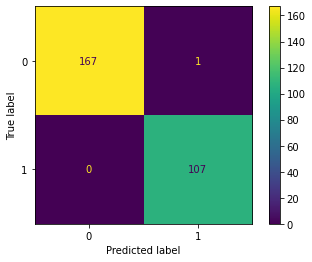

In [23]:
knn_model.fit(x_train, y_train)
y_knn = knn_model.predict(x_test)
show_result(y_test, y_knn)

## 4. SVM

In [24]:
param_grid = {'kernel':['rbf', 'sigmoid']}

grid = GridSearchCV(SVC(), param_grid, n_jobs=-1)
grid.fit(x_train, y_train)

GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'kernel': ['rbf', 'sigmoid']})

In [25]:
grid.best_params_

{'kernel': 'rbf'}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       503

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097



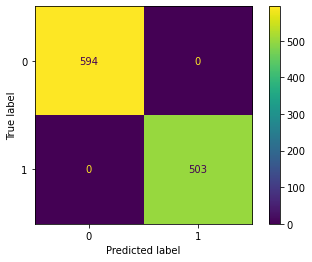

In [26]:
svm_model = SVC(kernel='rbf')

y_cv = cross_val_predict(svm_model, x_train, y_train, cv=k, n_jobs=-1)
show_result(y_train, y_cv)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       168
           1       1.00      1.00      1.00       107

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



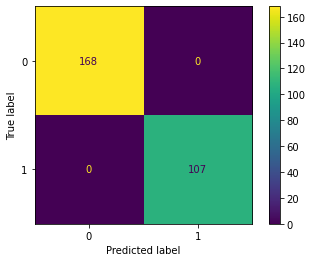

In [27]:
svm_model.fit(x_train, y_train)
y_svm = svm_model.predict(x_test)
show_result(y_test, y_svm)

## 5. Random Forest

In [28]:
param_grid = {'n_estimators':[20, 30, 50, 100], 
              'criterion':["gini", "entropy"]
             }

grid = GridSearchCV(RandomForestClassifier(random_state=1), param_grid, n_jobs=-1)
grid.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [20, 30, 50, 100]})

In [29]:
grid.best_params_

{'criterion': 'gini', 'n_estimators': 30}

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       594
           1       0.99      0.99      0.99       503

    accuracy                           0.99      1097
   macro avg       0.99      0.99      0.99      1097
weighted avg       0.99      0.99      0.99      1097



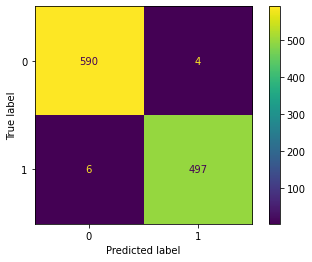

In [30]:
rf_model = RandomForestClassifier(criterion='gini', n_estimators=30, random_state=1, n_jobs=-1)

y_cv = cross_val_predict(rf_model, x_train, y_train, cv=k, n_jobs=-1)
show_result(y_train, y_cv)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       168
           1       0.97      1.00      0.99       107

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



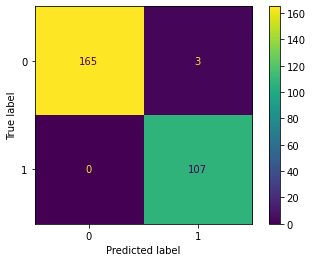

In [31]:
rf_model.fit(x_train, y_train)
y_rf = rf_model.predict(x_test)
show_result(y_test, y_rf)

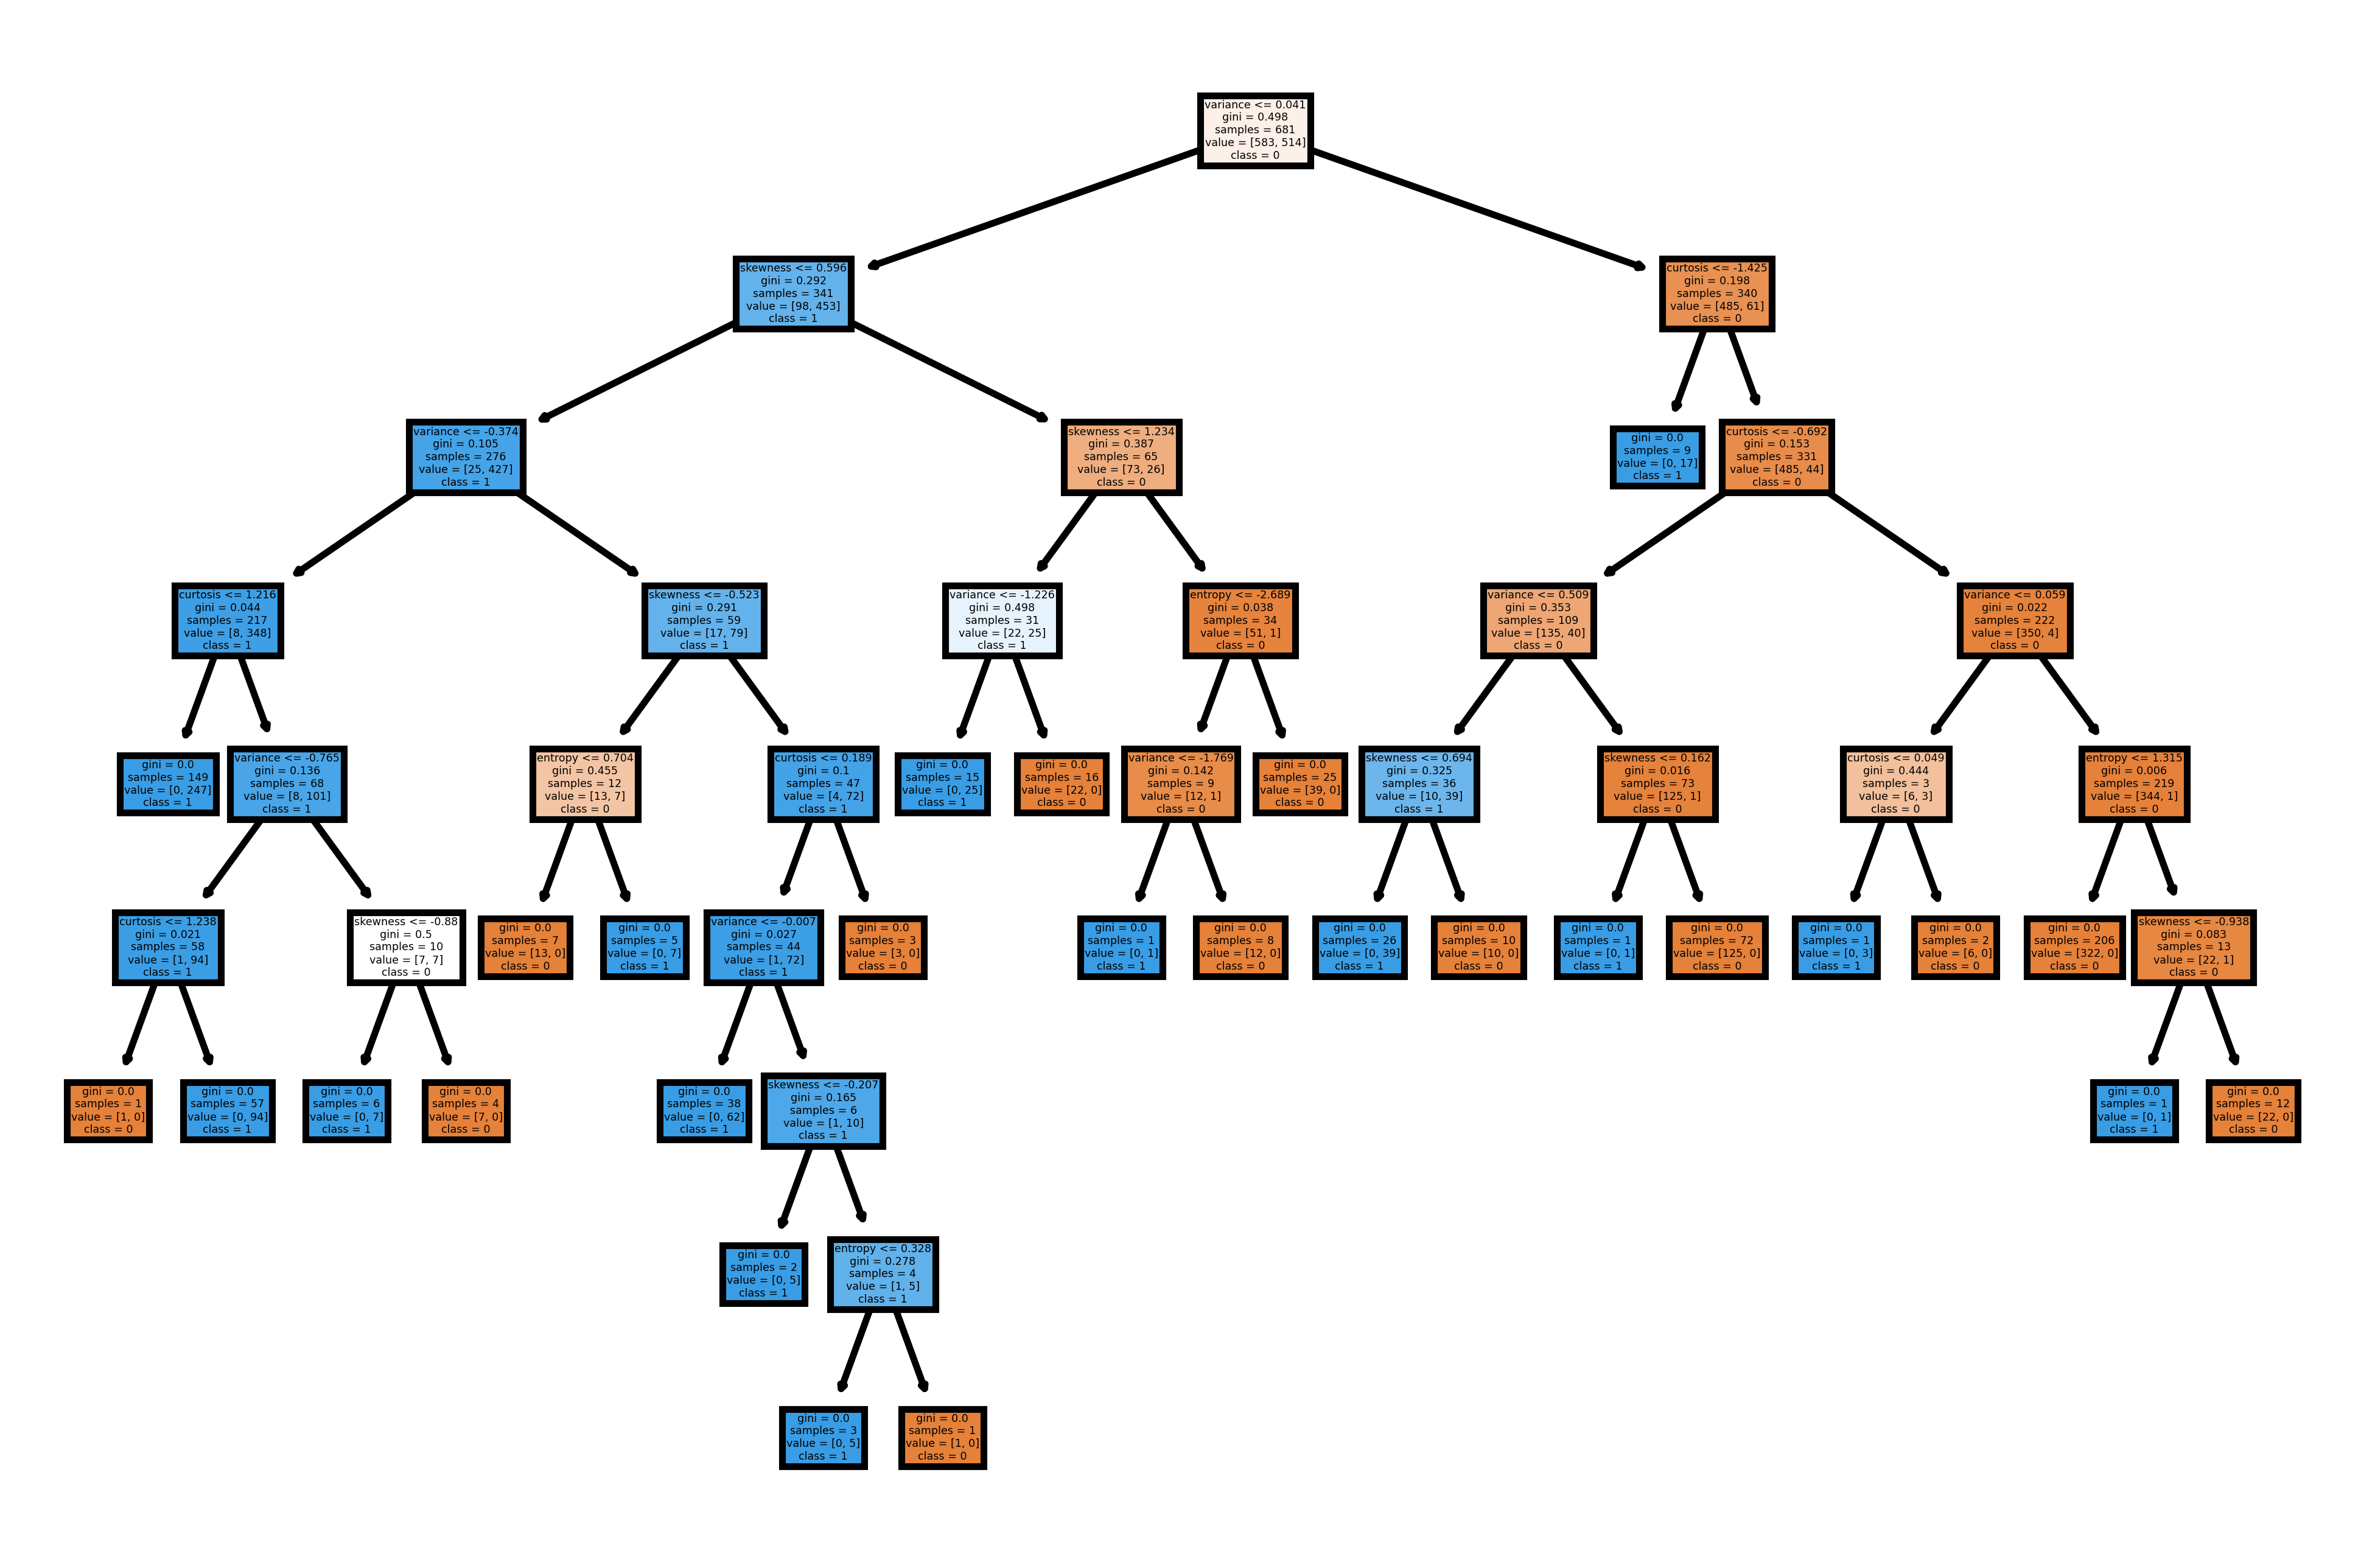

In [32]:
# the image of one of the Decision Trees
plt.figure(dpi=800)
tree.plot_tree(rf_model.estimators_[0], feature_names=X.columns, class_names=['0','1'], filled=True);
plt.savefig('./images/decision_tree.png');

## 6. Neural Networks

In [33]:
# number of neurons in hidden layer: (input + outputs)/2
np.ceil((4+1)/2)

3.0

In [34]:
param_grid = {'hidden_layer_sizes':[(4,4), (4,), (8,)], 
              'activation':['identity', 'logistic', 'tanh', 'relu'], 
              'solver':['lbfgs', 'sgd', 'adam'], 
              'max_iter':[100, 200, 300]
             }

grid = GridSearchCV(MLPClassifier(), param_grid, n_jobs=-1)
grid.fit(x_train, y_train)

GridSearchCV(estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(4, 4), (4,), (8,)],
                         'max_iter': [100, 200, 300],
                         'solver': ['lbfgs', 'sgd', 'adam']})

In [35]:
grid.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': (8,),
 'max_iter': 100,
 'solver': 'lbfgs'}

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       503

    accuracy                           1.00      1097
   macro avg       1.00      1.00      1.00      1097
weighted avg       1.00      1.00      1.00      1097



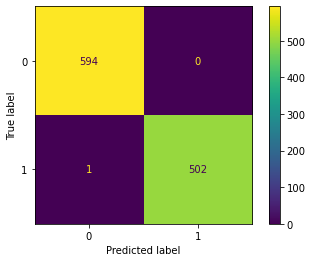

In [36]:
nn_model = MLPClassifier(activation='logistic', hidden_layer_sizes=(8,), max_iter=200, solver='lbfgs')
y_cv = cross_val_predict(nn_model, x_train, y_train, cv=k, n_jobs=-1)
show_result(y_train, y_cv)

In [37]:
nn_model.fit(x_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(8,), solver='lbfgs')

In [38]:
nn_model.n_layers_, nn_model.n_outputs_

(3, 1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       168
           1       1.00      1.00      1.00       107

    accuracy                           1.00       275
   macro avg       1.00      1.00      1.00       275
weighted avg       1.00      1.00      1.00       275



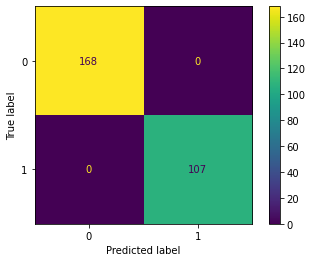

In [39]:
y_nn = nn_model.predict(x_test)
show_result(y_test, y_nn)